In [1]:
from math import sqrt
from scipy import stats
from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Credit Card Fraud Detection Project: Classification

### Acquire

In [2]:
df = pd.read_csv('fraudTrain.csv') ## <-- reading csv into pandas
df.shape

(1296675, 23)

In [3]:
df.head() ## <-- looking at a sample of our dataframe

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df = df.drop(columns = "Unnamed: 0") ## <-- dropping the extra index
df.head() 

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df.describe().T  ## <-- Looking at our transposed numerical statistics

,count,mean,std,min,25%,50%,75%,max
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01
is_fraud,1296675.0,5.788652e-03,7.586269e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [6]:
df.info() ## <-- looking at our columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [7]:
df.is_fraud.value_counts() ## <-- looking at target variable value counts

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [8]:
## creating a list of columns I want value counts for

cols = ['state', 'gender', 'category', 'job'] 

for col in cols:
    print(f'{col} Value Counts:\n')
    print(df[col].value_counts())
    print('-----------------------')

state Value Counts:

TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: state, dtype: int64
-----------------------
gender Value Counts:

F    709863
M    586812
Name: gender, dtype: int64
-----------------------
category Value Counts:

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91

### Prepare

In [9]:
df.isna().sum() ## <-- checking for null values we don't have any that is good

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#### Creating Datetime object and Columns

In [10]:
df = df.rename(columns = {'trans_date_trans_time': 'trans_time'})
df.head(1)

,trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0


In [11]:
## turn the transaction time to datetime format

df.trans_time = pd.to_datetime(df.trans_time) 

#### Using Datetime 
 - Deriving More Features
     - Hour
     - Weekday
     - Month
     - Year
     

In [12]:
df['weekday'] = df['trans_time'].dt.weekday ## getting weekday column
df['weekday']

0          1
1          1
2          1
3          1
4          1
          ..
1296670    6
1296671    6
1296672    6
1296673    6
1296674    6
Name: weekday, Length: 1296675, dtype: int64

In [13]:
df['trans_hour'] = df['trans_time'].dt.hour ## getting hour column
df['trans_hour']

0           0
1           0
2           0
3           0
4           0
           ..
1296670    12
1296671    12
1296672    12
1296673    12
1296674    12
Name: trans_hour, Length: 1296675, dtype: int64

In [14]:
df['year'] = df['trans_time'].dt.year ## getting year column
df['year']

0          2019
1          2019
2          2019
3          2019
4          2019
           ... 
1296670    2020
1296671    2020
1296672    2020
1296673    2020
1296674    2020
Name: year, Length: 1296675, dtype: int64

In [15]:
df['month'] = df['trans_time'].dt.month ## getting month column
df['month']

0          1
1          1
2          1
3          1
4          1
          ..
1296670    6
1296671    6
1296672    6
1296673    6
1296674    6
Name: month, Length: 1296675, dtype: int64

#### Feature Engineering

In [16]:
## making boolean columns for hypothesized common fraud purchase categories

df['entertainment'] = np.where(df.category == 'entertainment', 1, 0)
df['home'] = np.where(df.category == 'home', 1, 0)
df['shopping_net'] = np.where(df.category == 'shopping_net', 1, 0)
df['misc_net'] = np.where(df.category == 'misc_net', 1, 0)
df['grocery_net'] = np.where(df.category == 'grocery_net', 1, 0)
df['travel'] = np.where(df.category == 'travel', 1, 0)

## making boolean columns for other columns that may be valueable to split up

df['is_male'] = np.where(df.gender == 'M', 1, 0)
df['is_female'] = np.where(df.gender == 'F', 1, 0)

## States with highest amounts of CC Fraud (looked on internet)

df['Nevada'] = np.where(df.state == 'NV', 1, 0)
df['California'] = np.where(df.state == 'CA', 1, 0)
df['New_Mexico'] = np.where(df.state == 'NM', 1, 0)
df['Florida'] = np.where(df.state == 'FL', 1, 0)
df['Texas'] = np.where(df.state == 'TX', 1, 0)
df['Virginia'] = np.where(df.state == 'VA', 1, 0)
df['Arizona'] = np.where(df.state == 'AZ', 1, 0)

In [17]:
## Getting the Age of the Customer

df['dob'] = pd.to_datetime(df['dob'])
df['customer_age'] = np.round((df['trans_time'] - df['dob'])/np.timedelta64(1,'Y'))

df['customer_age'] = df['customer_age'].astype(int)
df['customer_age']

0          31
1          41
2          57
3          52
4          33
           ..
1296670    59
1296671    41
1296672    53
1296673    40
1296674    25
Name: customer_age, Length: 1296675, dtype: int64

##### Making Bins

In [18]:
## Looking at our maximum age and minimum age to make some age bins

df.customer_age.max(), df.customer_age.min()

(96, 14)

In [19]:
## creating the age bins with integer labels for easier feature engineering

df['age_bin'] = pd.cut(df.customer_age, 
                       bins = [0, 20, 40, 60, 96],
                       labels = [1, 2, 3, 4])

df['age_bin'].value_counts() ## <-- quality assurance check of column values

2    502486
3    488483
4    262691
1     43015
Name: age_bin, dtype: int64

In [20]:
## Looking at our maximum amount and minimum amount to make some transaction amount bins

df.amt.max(), df.amt.min()

(28948.9, 1.0)

<AxesSubplot:xlabel='amt'>

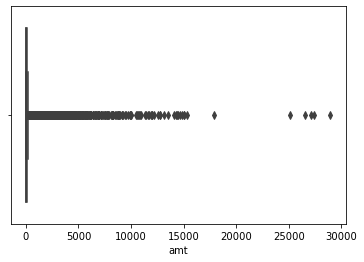

In [21]:
## Visualizing amounts to help my decision with binning

sns.boxplot(data = df, x = 'amt')

In [22]:
## creating the amount bins with integer labels for easier feature engineering

df['amt_bin'] = pd.cut(df.amt, 
                       bins = [0, 25, 40, 50, 100, 200, 30000],
                       labels = [1, 2, 3, 4, 5, 6])

df['amt_bin'].value_counts() ## <-- quality assurance check of my amt_bin column

1    463556
4    389483
5    172969
2    118829
3     89914
6     61924
Name: amt_bin, dtype: int64

#### Using Bins to Make Features

In [40]:
## Making categorical Columns for the amount bin that I created

df['0-25_dollars'] = np.where(df.amt_bin == 1, 1, 0)
df['25-40_dollars'] = np.where(df.amt_bin == 2, 1, 0)
df['40-50_dollars'] = np.where(df.amt_bin == 3, 1, 0)
df['50-100_dollars'] = np.where(df.amt_bin == 4, 1, 0)
df['100-200_dollars'] = np.where(df.amt_bin == 5, 1, 0)
df['high_dollars'] = np.where(df.amt_bin == 6, 1, 0)

## Making categorical Columns for the age bin that I created

df['0-20_age'] = np.where(df.age_bin == 1, 1, 0)
df['20-40_age'] = np.where(df.age_bin == 2, 1, 0)
df['40-60_age'] = np.where(df.age_bin == 3, 1, 0)
df['60-96_age'] = np.where(df.age_bin == 4, 1, 0)

#### Performing Train Test Split

In [24]:
## splitting the data stratifying for out target variable is_fraud

train_validate, test = train_test_split(df, test_size=.2, 
                                    random_state=123,
                                    stratify = df.is_fraud)
train, validate = train_test_split(train_validate, test_size=.3, 
                               random_state=123,
                               stratify= train_validate.is_fraud)

In [25]:
train.shape, validate.shape, test.shape ## <-- making sure our shapes look good

((726138, 54), (311202, 54), (259335, 54))

#### Making sure we have positive cases of fraud in each split

In [26]:
train.is_fraud.value_counts()

0    721934
1      4204
Name: is_fraud, dtype: int64

In [27]:
validate.is_fraud.value_counts()

0    309401
1      1801
Name: is_fraud, dtype: int64

In [28]:
test.is_fraud.value_counts()

0    257834
1      1501
Name: is_fraud, dtype: int64

#### Peeking at Train Split

In [39]:
print(train.columns)

train.head(3)

Index(['trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'weekday', 'trans_hour', 'year', 'month', 'entertainment',
       'home', 'shopping_net', 'misc_net', 'grocery_net', 'travel', 'is_male',
       'is_female', 'Nevada', 'California', 'New_Mexico', 'Florida', 'Texas',
       'Virginia', 'Arizona', 'customer_age', 'age_bin', 'amt_bin',
       '0-25_dollars', '25-40_dollars', '40-50_dollars', '50-100_dollars',
       '100-200_dollars', 'other_dollars', '0-20_age', '20-40_age',
       '40-60_age', '60-96_age'],
      dtype='object')


,trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,0-25_dollars,25-40_dollars,40-50_dollars,50-100_dollars,100-200_dollars,other_dollars,0-20_age,20-40_age,40-60_age,60-96_age
76830,2019-02-15 02:48:54,180011453250192,fraud_Volkman-Predovic,shopping_net,97.35,Craig,Dunn,M,721 Jacqueline Brooks,New Boston,...,0,0,0,1,0,0,0,1,0,0
140225,2019-03-17 15:01:34,676308307625,fraud_Thiel PLC,misc_pos,160.97,Donald,Evans,M,1287 Michael Roads,Washoe Valley,...,0,0,0,0,1,0,0,1,0,0
539623,2019-08-19 10:08:47,3597337756918966,fraud_Heidenreich PLC,grocery_pos,73.17,Linda,Gonzalez,F,17667 Price Spur Apt. 366,Glen Rock,...,0,0,0,1,0,0,0,0,0,1


### Explore

#### Engineered Variable Distributions

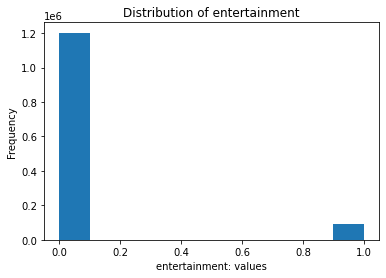

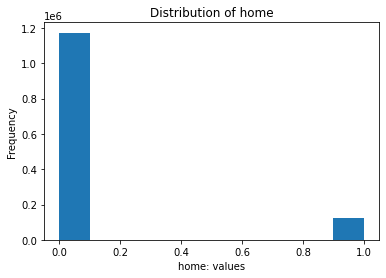

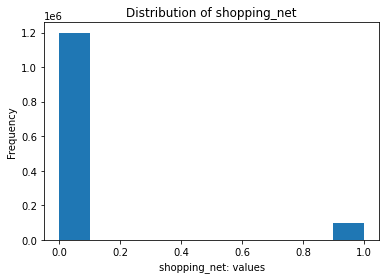

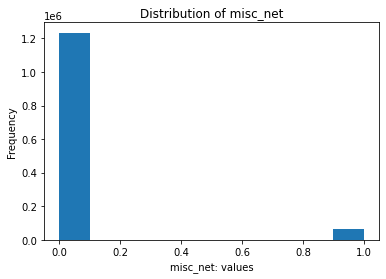

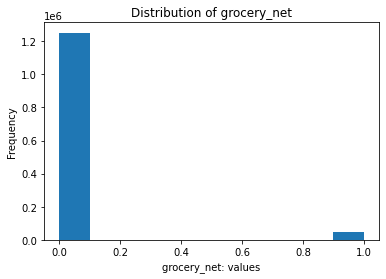

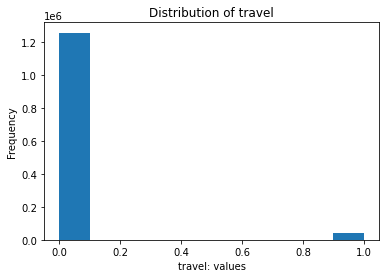

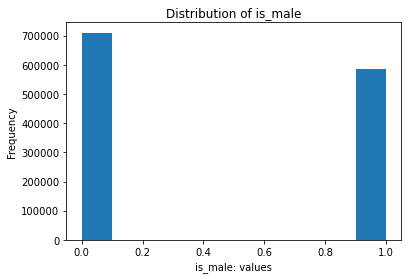

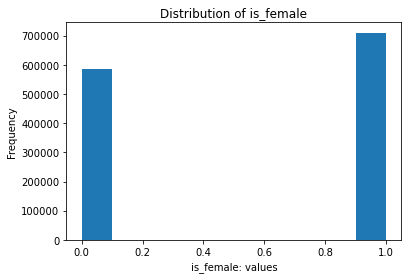

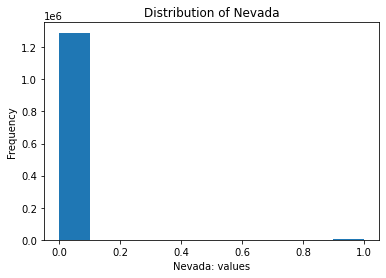

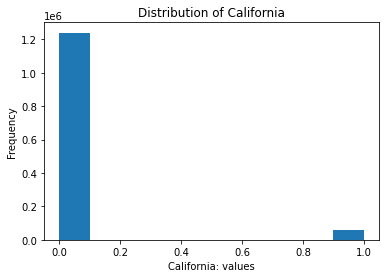

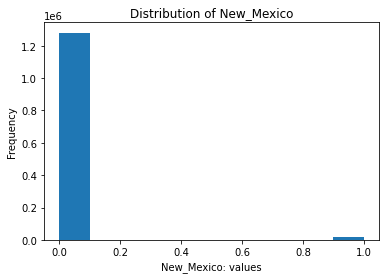

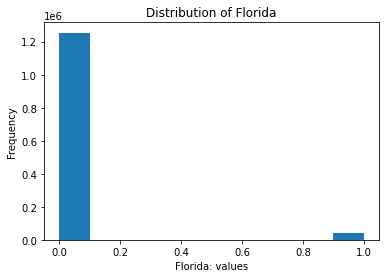

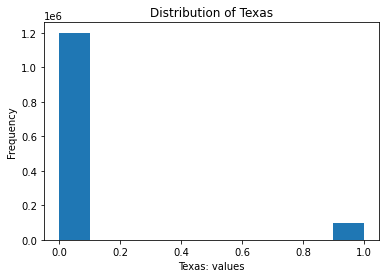

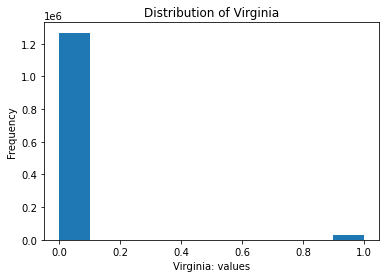

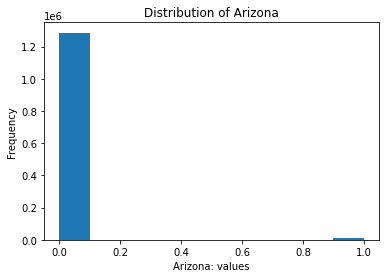

In [30]:
cols = ['entertainment', 'home', 'shopping_net', 'misc_net', 
        'grocery_net', 'travel', 'is_male', 'is_female',
        'Nevada', 'California', 'New_Mexico', 'Florida',
        'Texas', 'Virginia', 'Arizona']

for col in cols:
    plt.hist(df[col])
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
    plt.xlabel(f'{col}: values')
    plt.show()

#### Bar Graphs

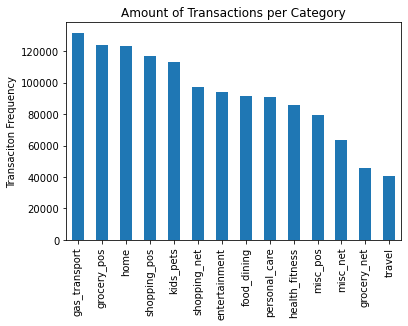

In [31]:
df['category'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per Category')
plt.show()

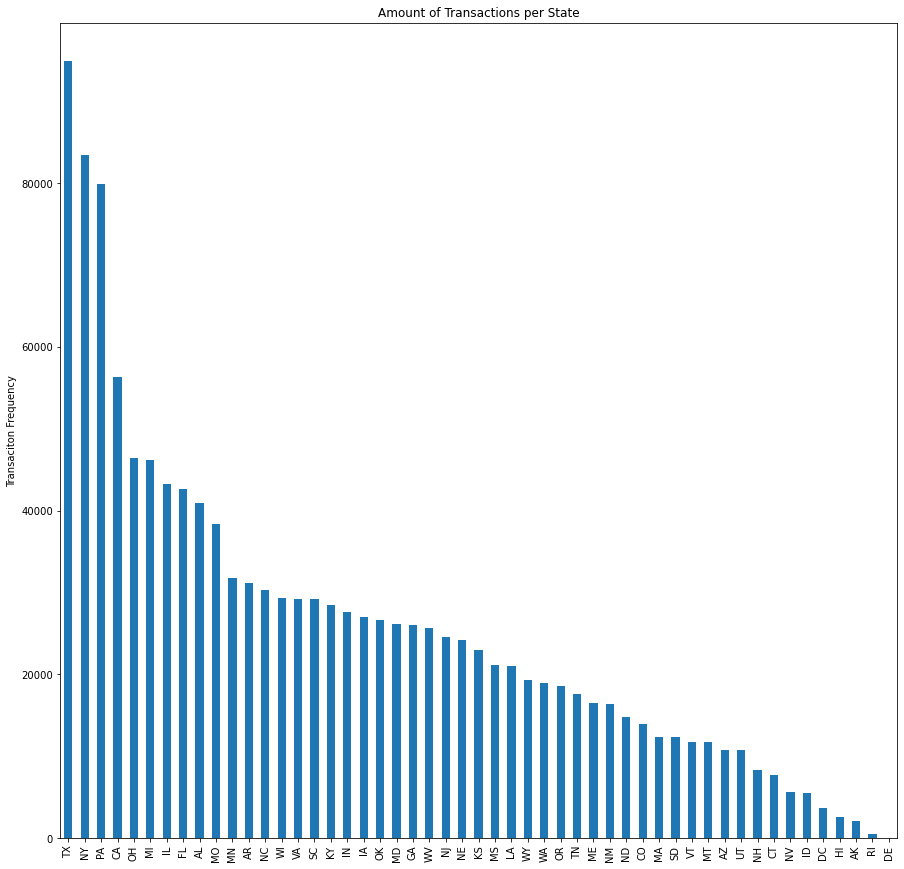

In [32]:
plt.figure(figsize = (15,15))
df['state'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per State')
plt.show()

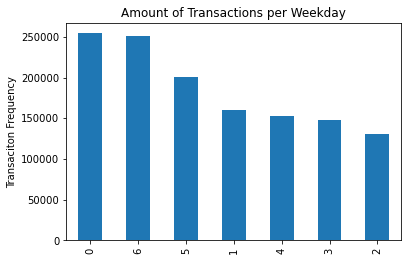

In [33]:
df['weekday'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per Weekday')
plt.show()

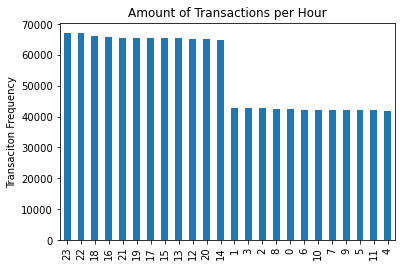

In [34]:
df['trans_hour'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per Hour')
plt.show()

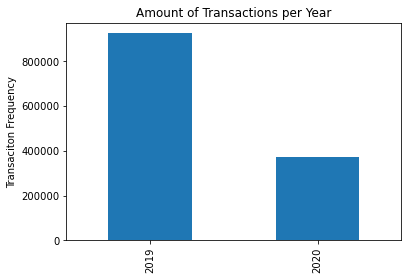

In [35]:
df['year'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per Year')
plt.show()

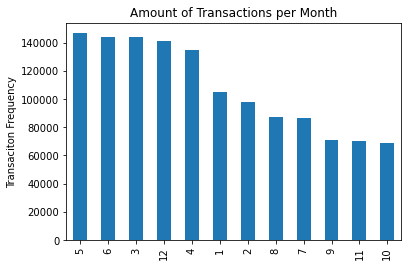

In [36]:
df['month'].value_counts().plot.bar()
plt.ylabel('Transaciton Frequency')
plt.title('Amount of Transactions per Month')
plt.show()

#### Heatmap with target variable

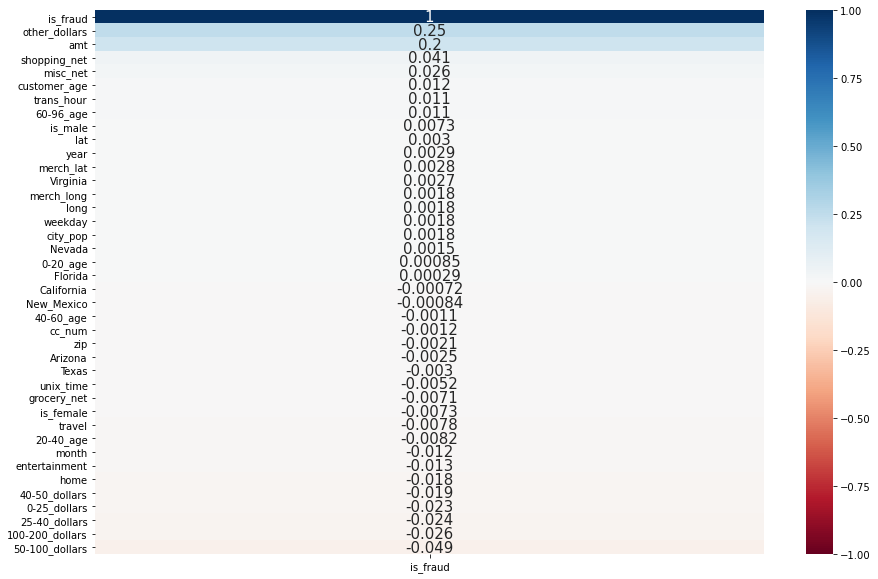

In [37]:
## making a heap map to look at correlations with is_fraud for the train data set
## helping me choose which features to use in my model

plt.figure(figsize = (15,10))  
sns.heatmap(train.corr()[['is_fraud']].sort_values(by='is_fraud', ascending = False), 
            cmap = 'RdBu', vmax = 1, vmin = -1, center = 0, annot = True, annot_kws={"size": 15} )
plt.show()                    